# Fuel Analysis

#### Library init and setup

In [26]:
import csv
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

#### Data standarization and storage

**Teams data structure**

`teams: dict` - Contains the dict of teams, with a *team* dict per each team

`team: dict` - Contains the team's data in keys, which are:
* `F_TYPE` - Fuel Type
* `FEF` - Fuel Efficiency Factor
* `DISPLACEMENT` - Engine Displacement (cc)
* `ACC_SCORE` - Acceleration event score
* `ACC_DNF` - DNF/DNA in Acceleration event participation
* `END_SCORE` - Endurance event score
* `END_DNF` - DNF/DNA in Endurance event participation

_Note_: Certain teams participated in Fuel Efficiency Event, but not in others, so a key's existence must be validated to avoid errors.

In [24]:
# Dict to contain each team's data in their own dict
teams = {}
fuel_path = "FSAE_2023_results/FSAE_2023_results - Efficiency results.csv"
acc_path = "FSAE_2023_results/FSAE_2023_results - Acceleration event results.csv"
end_path = "FSAE_2023_results/FSAE_2023_results - Endurance event results.csv"
info_path = "FSAE_2023_results/FSAE_2023_results - Team information.csv"

# Loading data of teams in Fuel Efficiency Event into dict
with open(fuel_path) as file:
    reader = csv.DictReader(file)

    for entry in reader:
        # Validate entry if lesser than max time allowed in event
        if float(entry["Average Adjusted Laptime"]) < 197.342:
            FEF_value = entry["Fuel Efficiency Factor"]
            # Cast value if it's != "", set it to 0 otherwise
            FEF = float(FEF_value) if FEF_value != "" else 0
            # Add Fuel type and FEF to team data
            teams[entry["Team"]] = {"F_TYPE": entry["Fuel Type"],"FEF": FEF}

# Loading each team's engine displacement
with open(info_path) as file:
    reader = csv.DictReader(file)

    for entry in reader:
        # Validate whether team participated in Fuel Efficiency Event 
        if entry["Team"] in teams:
            teams[entry["Team"]]["DISCPLACEMENT"] = entry["Engine Displacement (cc)"]

# Loading each team's acceleration score and DNF in said event
with open(acc_path) as file:
    reader = csv.DictReader(file)

    for entry in reader:
        # Validate wether team participated in Fuel Efficiency Event
        if entry["Team"] in teams:
            # Checking DNA/DNA in run
            values = [entry["Run #1 Time"], 
                      entry["Run #2 Time"], 
                      entry["Run #3 Time"],
                      entry["Run #4 Time"]]
            DNF = True if "DNA" in values or "DNF" in values else False

            # Add acceleration score and DNA/DNF data
            teams[entry["Team"]]["ACC_SCORE"] = float(entry["Score"])
            teams[entry["Team"]]["ACC_DNF"] = DNF

# Loading each team's endurance score and DNF in said event
with open(end_path) as file:
    reader = csv.DictReader(file)

    for entry in reader:
        # Validate wether team participated in Fuel Efficiency Event
        if entry["Team"] in teams:
            DNF = True if entry["Adjusted Time"] == "DNF" else False

            # Add endurance score and DNA/DNF data
            teams[entry["Team"]]["END_SCORE"] = float(entry["Endurance Score"])
            teams[entry["Team"]]["END_DNF"] = DNF


South Dakota State Univ -> {'F_TYPE': 'E85', 'FEF': 0.697, 'DISCPLACEMENT': '670', 'END_SCORE': 30.8, 'END_DNF': False}
Univ of North Carolina - Charlotte -> {'F_TYPE': '100', 'FEF': 0.688, 'DISCPLACEMENT': '450', 'ACC_SCORE': 63.52, 'ACC_DNF': False, 'END_SCORE': 254.8, 'END_DNF': False}
Univ of Calif - San Diego -> {'F_TYPE': '93', 'FEF': 0.66, 'DISCPLACEMENT': '700', 'ACC_SCORE': 79.63, 'ACC_DNF': False, 'END_SCORE': 253.5, 'END_DNF': False}
Univ of Akron -> {'F_TYPE': 'E85', 'FEF': 0.647, 'DISCPLACEMENT': '450', 'ACC_SCORE': 46.74, 'ACC_DNF': False, 'END_SCORE': 163.0, 'END_DNF': False}
Univ of Calif - Berkeley -> {'F_TYPE': 'E85', 'FEF': 0.626, 'DISCPLACEMENT': '450', 'ACC_SCORE': 56.14, 'ACC_DNF': False, 'END_SCORE': 18.0, 'END_DNF': True}
California Baptist University -> {'F_TYPE': '100', 'FEF': 0.624, 'DISCPLACEMENT': '690', 'ACC_SCORE': 67.6, 'ACC_DNF': False, 'END_SCORE': 61.6, 'END_DNF': False}
Univ of Colorado - Boulder -> {'F_TYPE': '93', 'FEF': 0.624, 'DISCPLACEMENT': '68

### Fuel used against average fuel efficiency factor (FEF)

FEF is calculated with the following formula:

FEF = (Tmin/Tyours) * (CO2min/CO2yours) * (Lapyours^2/Laptotal^2)

Being Tmin and C02min the least metric achieved in the competition, and yours being the one the team got.

Average FEF for each fuel type:
- 93: 0.3805, 22 teams.
- 100: 0.475, 11 teams.
- E85: 0.48, 13 teams.


Text(0, 0.5, 'Average Fuel Efficiency Factor')

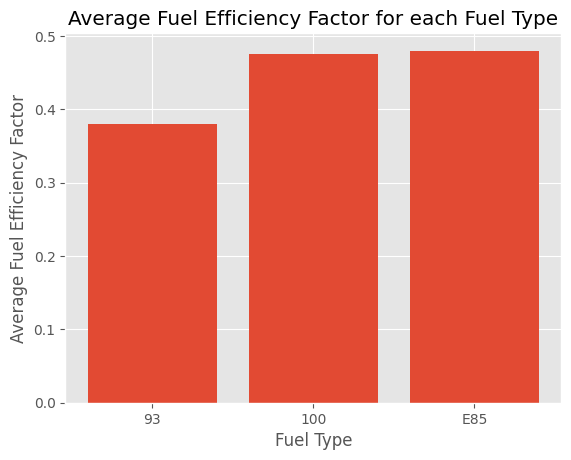

In [44]:
# Calculate average FEF for each fuel type
fuel_types = {"93": [], "100": [], "E85": []}

for team in teams:
    fuel_types[teams[team]["F_TYPE"]].append(teams[team]["FEF"])

print("Average FEF for each fuel type:")

for fuel in fuel_types:
    avrg = np.mean(fuel_types[fuel])
    print(f"- {fuel}: {round(avrg,4)}, {len(fuel_types[fuel])} teams.")
    fuel_types[fuel] = avrg

# Plot average FEF for each fuel type
fig, ax = plt.subplots()
ax.bar(fuel_types.keys(), fuel_types.values())

# Style the plot
ax.set_title("Average Fuel Efficiency Factor for each Fuel Type")
ax.set_xlabel("Fuel Type")
ax.set_ylabel("Average Fuel Efficiency Factor")



### Fuel categorization: Average FEF per engine displacement

### FEF - Performance scores and Reliability per event (Acceleration, Endurance)